In [17]:
!pip install sodapy
from sodapy import Socrata
import pandas as pd
import numpy as np
import re


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


## Analisis exploratorio y correccion de datos raros o falatantes

In [18]:
def load_colombia_df():
    client = Socrata("www.datos.gov.co", None)
    results = client.get("gt2j-8ykr", limit=100000)
    results_df = pd.DataFrame.from_records(results)
    return results_df

df = load_colombia_df()
df.to_csv("ins_covid.csv", index=False)

In [19]:
df

,id_de_caso,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,España,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,España,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,Colombia,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,Colombia,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18325,18366,2020-05-18T00:00:00.000,5001,Medellín,Antioquia,Casa,39,F,En estudio,Leve,Colombia,2020-05-16T00:00:00.000,- -,2020-05-21T00:00:00.000,- -,2020-05-21T00:00:00.000
18326,18367,2020-05-13T00:00:00.000,76001,Cali,Valle del Cauca,Casa,29,M,En estudio,Leve,Colombia,2020-05-09T00:00:00.000,- -,2020-05-21T00:00:00.000,- -,2020-05-21T00:00:00.000
18327,18368,2020-05-18T00:00:00.000,76001,Cali,Valle del Cauca,Casa,7,M,En estudio,Leve,Colombia,2020-05-12T00:00:00.000,- -,2020-05-21T00:00:00.000,- -,2020-05-21T00:00:00.000
18328,18369,2020-05-16T00:00:00.000,25307,Girardot,Cundinamarca,Casa,48,F,En estudio,Asintomático,Colombia,Asintomático,- -,2020-05-21T00:00:00.000,- -,2020-05-21T00:00:00.000


In [20]:
df.drop(columns=['id_de_caso'], inplace=True)
df.drop(columns=['ciudad_de_ubicaci_n'], inplace=True)
df.drop(columns=['codigo_divipola'], inplace=True)
df.drop(columns=['fecha_reporte_web'], inplace=True)
df.drop(columns=['fecha_de_notificaci_n'], inplace=True)
df.drop(columns=['fis'], inplace=True)


In [21]:
df.columns = ['departamento', 'atencion', 'edad', 'sexo', 'tipo', 'estado', 'procedencia', 'muerte', 'diagnostico', 'recuperado']

In [22]:
letter = ['departamento', 'atencion', 'tipo', 'estado', 'procedencia','sexo']
for i in letter:
    df[i] = df[i].str.lower()

In [23]:
df = df.dropna()
df = df.reset_index()
df.drop(columns=['index'], inplace=True)

In [24]:
for i in range(0, df.shape[0]):
    x = re.findall(r"[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]",df['diagnostico'][i])
    y = re.findall(r"[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]",df['recuperado'][i])
    z = re.findall(r"[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]",df['muerte'][i])
    if len(x) == 0:
        df['diagnostico'][i] = ""
    else:
        df['diagnostico'][i] = x[0]

    if len(y) == 0:
        df['recuperado'][i]  = ""
    else:
        df['recuperado'][i]  = y[0]

    if len(z) == 0:
        df['muerte'][i] =  ""
    else:
        df['muerte'][i] = z[0]

## analisis exploratorio inicial


In [25]:
indexes = df[df.edad == '-   -'].index
df.drop(indexes , inplace=True)

In [26]:
df['departamento'].value_counts()

bogotá d.c.                                                6304
valle del cauca                                            1887
cartagena d.t. y c.                                        1672
amazonas                                                   1384
barranquilla d.e.                                          1123
atlántico                                                  1063
meta                                                        963
nariño                                                      592
antioquia                                                   587
cundinamarca                                                391
santa marta d.t. y c.                                       255
risaralda                                                   239
huila                                                       224
magdalena                                                   209
tolima                                                      177
buenaventura d.e.                       

In [27]:
df['departamento'].unique()

array(['bogotá d.c.', 'valle del cauca', 'antioquia',
       'cartagena d.t. y c.', 'huila', 'meta', 'risaralda',
       'norte de santander', 'caldas', 'cundinamarca',
       'barranquilla d.e.', 'santander', 'quindío', 'tolima', 'cauca',
       'santa marta d.t. y c.', 'cesar',
       'archipiélago de san andrés providencia y santa catalina',
       'casanare', 'nariño', 'atlántico', 'boyacá', 'córdoba', 'bolívar',
       'sucre', 'magdalena', 'la guajira', 'buenaventura d.e.', 'chocó',
       'amazonas', 'caquetá', 'putumayo', 'arauca', 'vaupés'],
      dtype=object)

In [28]:
df['sexo'].value_counts()

m    10185
f     8116
Name: sexo, dtype: int64

In [30]:
df2 = df.copy()
df2 = df2[(df.muerte != "") | (df2.recuperado != "")]
df2.reset_index()
df2.drop(columns = ['atencion', 'diagnostico'], inplace = True)

# Arbol de desicion y machine learning

In [31]:
from sklearn import preprocessing as pp

LE = pp.LabelEncoder()
LB = pp.LabelBinarizer()

LE.fit(df2.departamento)
df2.departamento = LE.fit_transform(df2.departamento)
df2.sexo = LB.fit_transform(df2.sexo)
df2.tipo = LE.fit_transform(df2.tipo)
df2.estado = LE.fit_transform(df2.estado)
df2.muerte = LB.fit_transform(df2.muerte)
df2.procedencia = LE.fit_transform(df2.procedencia)

In [32]:
df2

,departamento,edad,sexo,tipo,estado,procedencia,muerte,recuperado
0,5,19,0,1,2,26,1,2020-03-13
1,30,34,1,1,2,17,1,2020-03-19
2,1,50,0,1,2,17,1,2020-03-15
3,1,55,1,2,2,9,1,2020-03-26
4,1,25,1,2,2,9,1,2020-03-23
...,...,...,...,...,...,...,...,...
17734,11,89,0,0,1,9,0,
17763,18,55,1,0,1,9,0,
17914,11,55,1,0,1,9,0,
18153,0,41,1,2,2,9,1,2020-05-05


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



In [34]:
X, y = df2[['departamento',	'edad',	'sexo',	'tipo',	'estado']], df2.muerte
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(y_test.value_counts(), y_train.value_counts())

1    1329
0     196
Name: muerte, dtype: int64 1    3101
0     456
Name: muerte, dtype: int64


In [35]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Se utilizo matriz de confusion para medir el rendimiento debido a que su prediccion es binaria

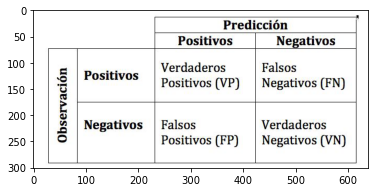

In [36]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
url = "https://www.juanbarrios.com/wp-content/uploads/2019/07/matriz.jpg"
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)
plt.show()

In [38]:
y_pred = clf.predict(X_test)
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :', accuracy_score(y_test, y_pred)) 
print('Report : ')
print(classification_report(y_test,  y_pred)) 


Confusion Matrix :
[[ 174   22]
 [   0 1329]]
Accuracy Score : 0.9855737704918033
Report : 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       196
           1       0.98      1.00      0.99      1329

    accuracy                           0.99      1525
   macro avg       0.99      0.94      0.97      1525
weighted avg       0.99      0.99      0.99      1525

